# Super Resolution Dataset

This code is only for testing the custom super resolution dataset.

In [1]:
from datasets import SuperResolutionDataset

# Instanciate a custom super resolution dataset
sr_dataset = SuperResolutionDataset("data", scaling_factor=8)

# Print the dataset size
print(f"Super resolution dataset size: {len(sr_dataset)}")

Super resolution dataset size: 13


In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


def display_tensors(tensor1, tensor2, title=None):
    """Display a pair of image tensors side to side."""

    # Define the ToPILImage transform
    to_pil_image_transform = transforms.ToPILImage()

    # Convert the image tensors to PIL images
    image1 = to_pil_image_transform(tensor1)
    image2 = to_pil_image_transform(tensor2)

    # Get the size of the two images
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Find the maximum size
    width = max(width1, width2)
    height = max(height1, height2)

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Display the first image in the first subplot
    axs[0].imshow(image1)
    axs[0].axis('off')

    # Display the second image in the second subplot
    axs[1].imshow(image2)
    axs[1].axis('off')

    # Add a title to the figure
    if title is not None:
        plt.suptitle(title, fontsize=10)

    # Show the figure
    plt.show()

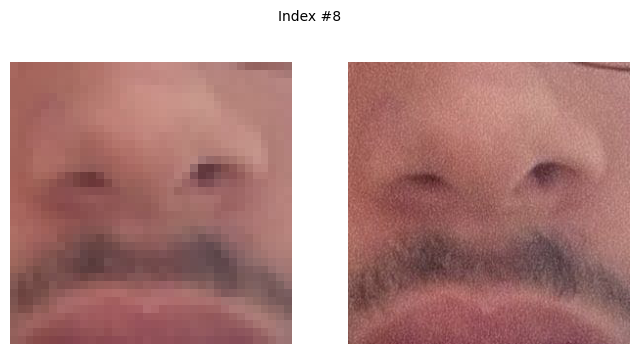

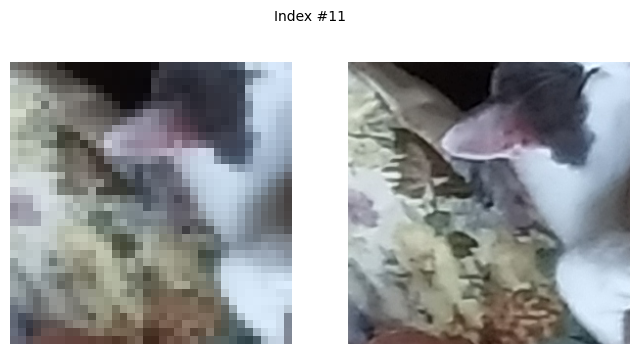

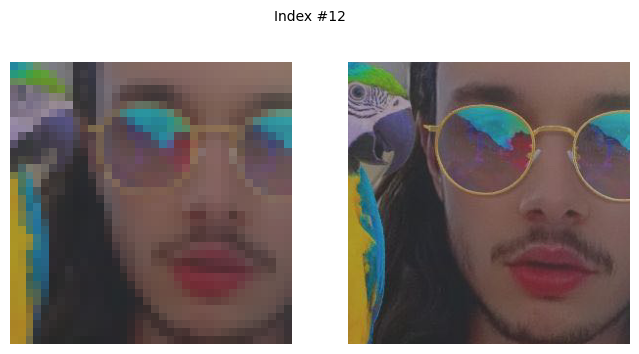

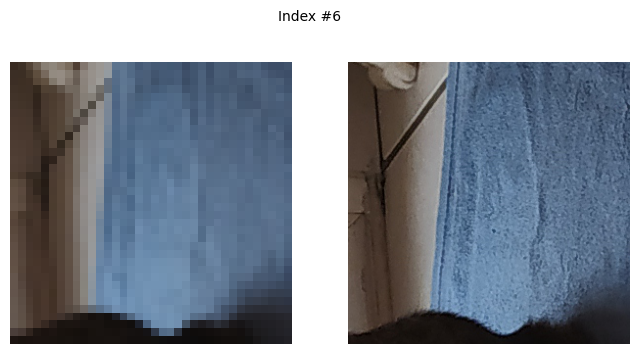

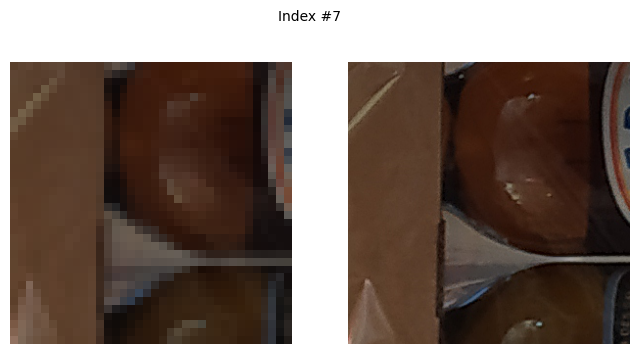

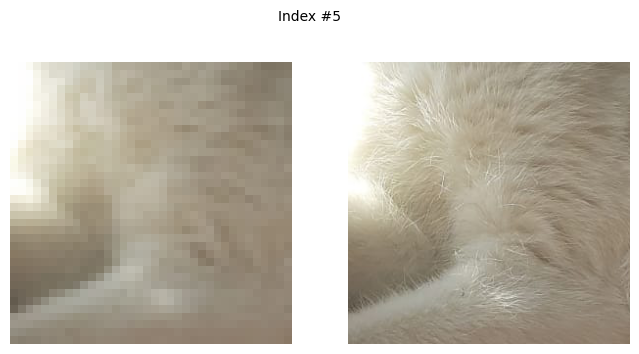

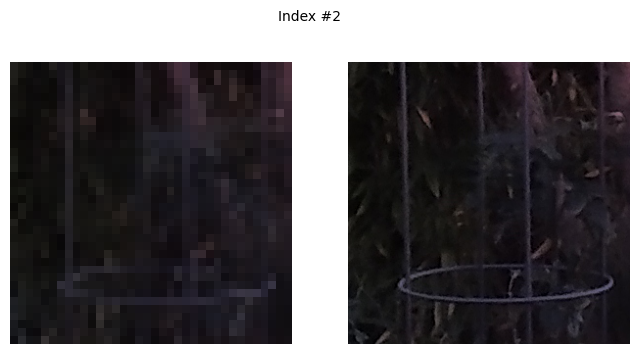

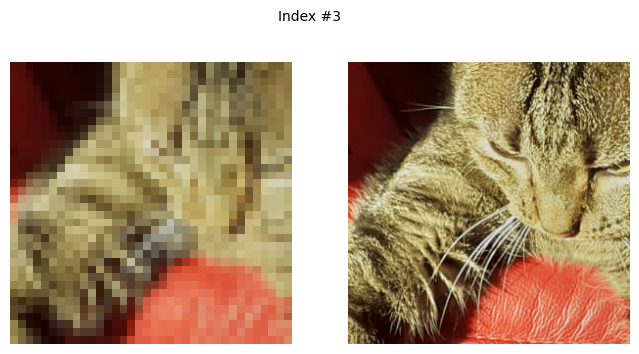

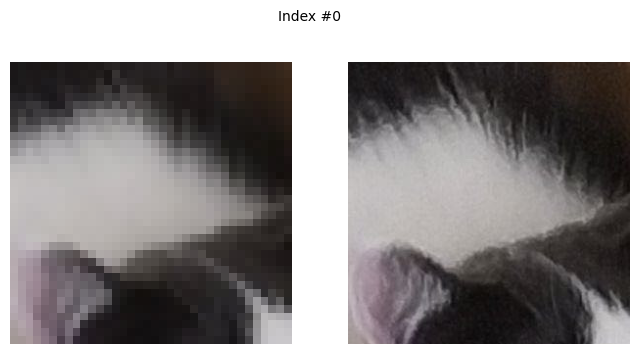

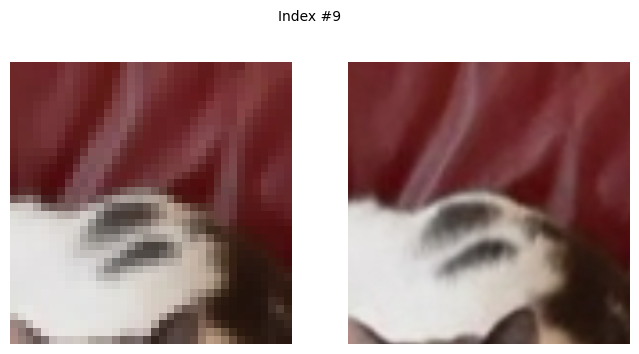

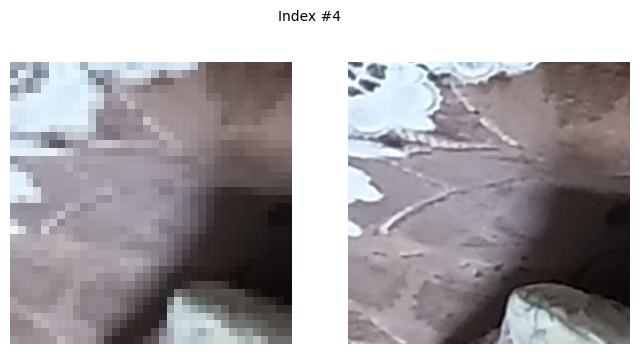

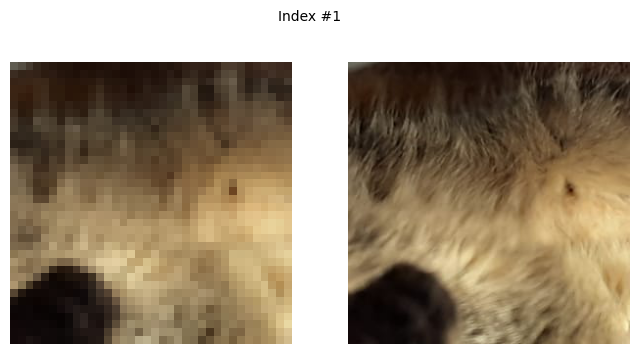

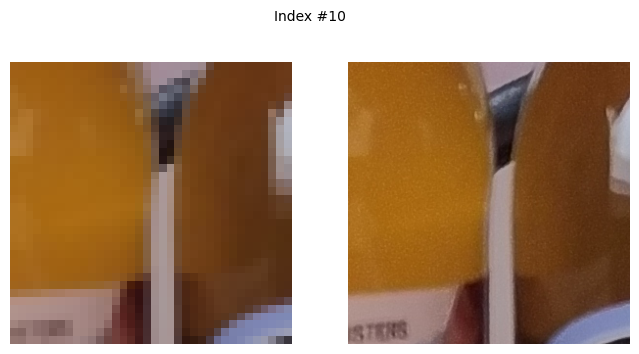

In [3]:
import random

# Initializes the list of used indexes (to avoid having the same image multiple times)
used_indexes = []

# Iterate 10 times
for _ in range(20):
    # Make sure there are any images left
    if len(used_indexes) == len(sr_dataset):
        break

    # Find an unused index
    index = random.randint(0, len(sr_dataset) - 1)
    while index in used_indexes:
        index = random.randint(0, len(sr_dataset) - 1)

    # Retrieve and display the data pair associated with the index (low resolution and high resolution images)
    lr_image, hr_image = sr_dataset[index]
    display_tensors(lr_image, hr_image, title=f"Index #{index}")

    # Add the index to the used indexes list
    used_indexes += [index]